## <u>Bike Sharing Activity<u>

### Table of contents: 

[Problem statement](#ps)

[Data Description](#dd)

[Descriptive stats, Data Analysis & Graphs](#eda)

[Algorithm Selection](#lr)

[Regression Evaluation Metrics](#em)

[Overfitting and Underfitting analysis & Graphs](#ou)

[Observations and Conclusions](#oc)


### Problem statement<a name='ps'></a>

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

##### Objective: We are required to predict the total count of bikes rented during each hour covered.

##### Original Source

The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 


### Data Description<a name='dd'></a>

The dataset shows hourly rental data for two years (2011 and 2012). The training data set is for the first 19 days of each month. The test dataset is from 20th day to month’s end.<br/>
In the training data set, they have separately given bike demand by registered, casual users and sum of both is given as count.<br/>
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.<br/>

#####  Attributes
datetime:   date and hour in "mm/dd/yyyy hh:mm" format

season:     Four categories-> 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday:    whether the day is a holiday or not (1/0)

workingday: whether the day is neither a weekend nor holiday (1/0)

weather:    Four Categories of weather
            1-> Clear, Few clouds, Partly cloudy, Partly cloudy
            2-> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3-> Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4-> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
            
temp:       hourly temperature in Celsius

atemp:      "feels like" temperature in Celsius

humidity:   relative humidity

windspeed:  wind speed

### Descriptive stats, Data Analysis & Graphs <a name='eda'></a>

#### Loading the data 
<a id = "ld"> </a>

In [88]:
import numpy as np
import pandas as pd
import os
import pylab
print(os.getcwd())

E:\Tech UpX\Bike-Sharing-Dataset


In [89]:
url = "https://raw.githubusercontent.com/dataworkshop/bike_sharing_demand/master/train.csv"

In [90]:
df=pd.read_csv(url)

In [91]:
df1 = df

#### Understanding the dataset

In [92]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Top 6 rows of dataset

#### Info of dataset (Column dtype and memory usage)

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


**Observations:**<br/>
No of Rows: 10885<br/>
No of Columns: 12<br/>
There are no missing values.<br/>

In [94]:
df1.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Datatypes of each column

#### Descriptive statistics

In [95]:
df1.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Observations:**
There are no missing values.

#### Missing values if any

In [96]:
df1.isnull().values.any()

False

In [97]:
df1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### Extracting month, day, year, hours, minutes from datetime column

In [98]:
df1['datetime'] = pd.to_datetime(df1.datetime)

In [99]:
date1=df1["datetime"].apply(lambda x: pd.Series(str(x).split(' ')))

In [100]:
date=date1[0].apply(lambda x: pd.Series(str(x).split('-')))
time=date1[1].apply(lambda x: pd.Series(str(x).split(':')))

In [101]:
date.columns=["year","month","day"]
time.columns=["hours","minutes","seconds"]
time=time.drop(["seconds"],1)

In [102]:
frames=[df1,date,time]
df2 = pd.concat(frames,axis=1)
df2 = df2.drop(['datetime'], axis = 1)
df2.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hours,minutes
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,00
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,00


#### Exploratory Data analysis

#### Correlation

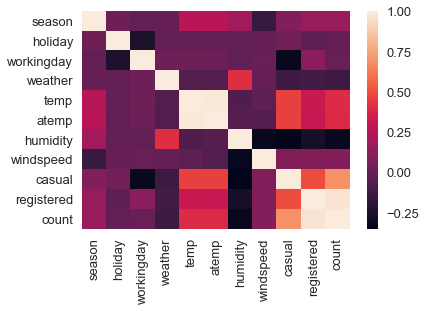

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df2.corr())
plt.show()

**Observations:** One common thing to understand is how a dependent variable is influenced by features (numerical) is to find a correlation matrix between them.  Temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity". <br/>

Windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count".

"atemp" is variable is not taken into since "atemp" and "temp" has strong correlation with each other. During model building any one of the variable has to be dropped as they will show multicollinearity in the data.

"Casual" and "Registered" are also not taken into consideration for model building.

In [167]:
df2.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


#### Outlier detection

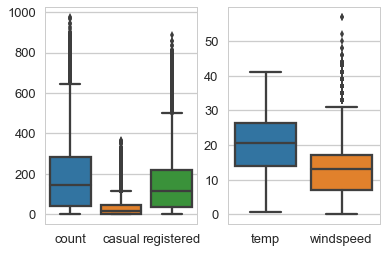

In [105]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=df1[['count','casual','registered']],ax=ax1)
sns.boxplot(data=df1[['temp','windspeed']],ax=ax2)

plt.show()

**Observations:** "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).

#### Some important visualizations

#### Season wise hourly distribution of counts

In [106]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (50, 20),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}


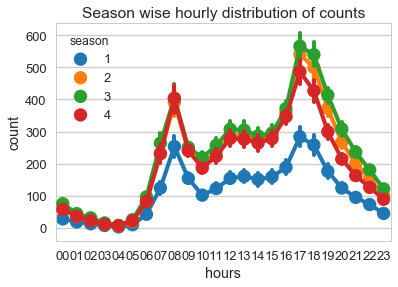

In [107]:
fig,ax = plt.subplots()
sns.pointplot(data=df2[['hours',
                        'count',
                        'season']],
              x='hours',
              y='count',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")
plt.show()

**Observations:** <br/>
1.First thing to understand from the above graph is that the users count is quite high in Fall season and very low in spring season.<br/>
2.Second thing, users are renting bike highly at 08:00 AM and 05:00 PM.

##### Seasonal distribution of counts

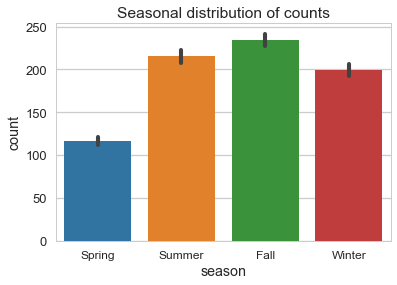

In [108]:
fig,ax = plt.subplots()
sns.barplot(data=df2[['season',
                      'count']],
              x='season',
              y='count',
              ax=ax)
ax.set(title="Seasonal distribution of counts")
ax.set_xticklabels(('Spring','Summer','Fall', 'Winter'), 
                   fontsize = 12)
plt.show()

**Observations:** From the above graph, it is obvious that Bike-sharing rental process is quite high in Summer and Fall seasons.

##### Monthly distribution of counts

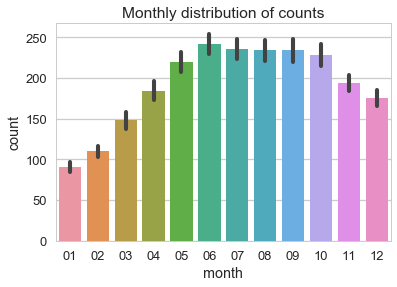

In [109]:
fig,ax = plt.subplots()
sns.barplot(data=df2[['month',
                    'count']],
              x='month',
              y='count',
              ax=ax)
ax.set(title="Monthly distribution of counts")
pylab.show()

**Observations:** We can conclude that bike sharing rentals are high in June,July and August months and very low in January month

##### Yearly counts

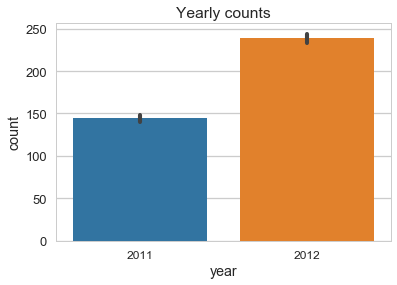

In [110]:
fig,ax = plt.subplots()
sns.barplot(data=df2[['year',
                      'count']],
              x='year',
              y='count',
              ax=ax)
ax.set(title="Yearly counts")
ax.set_xticklabels(('2011','2012'), 
                   fontsize = 12)
plt.show()

**Observations:** Rental bike sharing system increased gradually from 2011 to 2012. 

#### Splitting target variable

In [178]:
train_x = df2.drop(['count', 'casual', 'registered', 'atemp', 'windspeed'], axis = 1)
train_y = df2['count']

#### Data partition

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.4, random_state=101)

#### Feature scaling

In [180]:
from sklearn.preprocessing import minmax_scale

X_train[['temp']] = minmax_scale(X_train[['temp']])
X_valid[['temp']] = minmax_scale(X_valid[['temp']])

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\welcome\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [181]:
y_train.head(6)

10486    731
9836      11
7754     511
4572     152
4637      28
9555     104
Name: count, dtype: int64

### Algorithm Selection <a name='lr'></a>

#### Constructing Linear Model

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
# print the intercept
print(lm.intercept_)

-165370.832548


In [184]:
##Coefficients
coeff_df = pd.DataFrame(lm.coef_,train_x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
season,-6.924660
holiday,-9.523104
workingday,0.986161
weather,-4.964283
temp,271.137618
humidity,-2.087205
year,82.240975
month,9.980476
day,0.130059
hours,7.890172


In [196]:
###Predictions
predictions = lm.predict(X_valid)
from sklearn.metrics import r2_score
print("valid:",r2_score(y_valid,predictions))

valid: 0.38440764263


#### Residual histogram

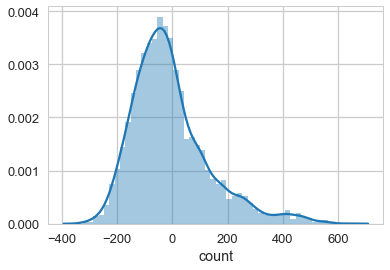

In [197]:
sns.distplot((y_valid-predictions),bins=50);
pylab.show()

## Regression Evaluation Metrics <a name='em'></a>

In [202]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 106.238909178
MSE: 19583.6261049
RMSE: 139.941509585


In [256]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Overfitting Underfitting analysis

##### Cross Validation

In [258]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform K-fold cross validation
scores = cross_val_score(lm, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross-validated scores: [ 0.39589691  0.42375794  0.40104995  0.36028599  0.41372994  0.39074138
  0.34374256  0.35453532  0.38946764  0.37949193]


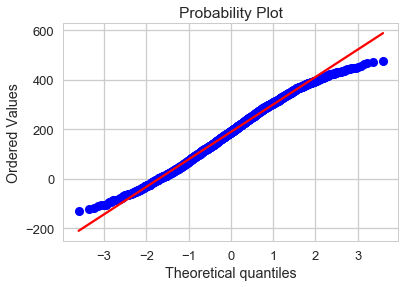

In [261]:
predictions1 = cross_val_predict(lm, X_valid, y_valid, cv=10)
import scipy.stats as stats
stats.probplot(predictions1, dist="norm", plot=pylab)
pylab.show()

### Observations and conclusions <a name='oc'></a>

The residuals for this model is very high which indicates that there is significant error between the predicted values. The R-squared value measured how close the data are to the fitted regression line. Our R-squared value is 0.384 which is indicative of a bad fit, therefore, a linear regression model should not be used for this dataset.